In [21]:
from scipy.cluster.hierarchy import single, fcluster, dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from numpy import average as avg
from sklearn.metrics.pairwise import *
from math import floor

np.set_printoptions(precision=2)

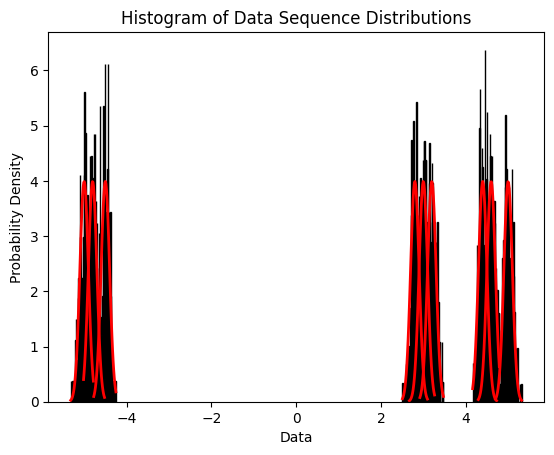

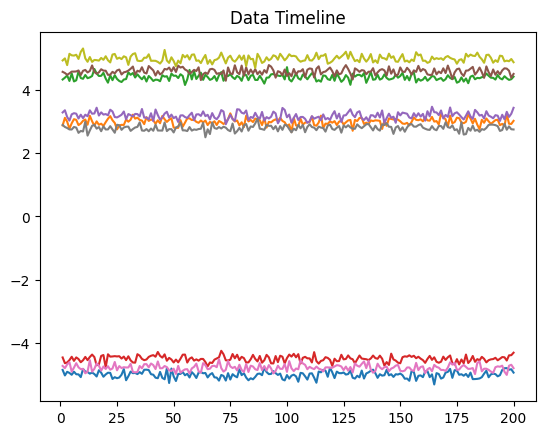

In [22]:
# Generate 6 data sequences - N(μ, σ)
# μ ∈ {-20, -15, -10, 10, 15, 20}
# σ = 1

# number of samples (FSS)
n = 200
# mu = [-2.3, -2, -1.7, -1.3, -1, -0.7, -0.1, 0.1, 0.7, 1, 1.3, 1.7, 2, 2.3]
mu = [-5, 3, 4.4,-4.5, 3.2, 4.6, -4.8, 2.8, 5]
sigma = 0.1
M = len(mu)
dth_mmd = 0.5
dth_ks = 0.97 

y = (normal(loc=mu, scale=sigma, size=(n, M))).T

for i in range (0, M):
    count, bins, ignored = plt.hist(y[i], 40, density=True, color='skyblue', edgecolor='black')
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu[i])**2 / (2 * sigma**2) ), linewidth=2, color='r')

plt.title('Histogram of Data Sequence Distributions')
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.show()

for i in range (0, len(y)):    
    data = y[i]
    xax = list(range(1, len(data) + 1))

    plt.plot(xax, data)
plt.title('Data Timeline')
plt.show()

In [23]:
def ks_dist(samples):
    M = len(samples)
    ks_dist = []

    for i in range (0, M):
        for j in range (i + 1, M):
            dist = stats.ks_2samp(samples[i], samples[j])[0]
            ks_dist.append(dist)
    
    ks_dist = np.array(ks_dist)

    return ks_dist

In [24]:
def mmd_dist(samples):
    g = 1
    M = len(samples)
    mmd_dist = []
    n = len(samples[0])

    for i in range (0, M):
        for j in range (i + 1, M):
            X = samples[i].reshape( (n ,1) )
            Y = samples[j].reshape( (n ,1) )

            Kx = rbf_kernel(X, gamma=g)
            Ky = rbf_kernel(Y, gamma=g)
            Kxy = rbf_kernel(X, Y, gamma=g)
            dist = avg(Kx) + avg(Ky) - 2 * avg(Kxy)
            
            mmd_dist.append(dist)
    
    mmd_dist = np.array(mmd_dist)

    return mmd_dist

In [25]:
def extract_clusters(Z, dth, M):
    n = len(Z)
    clusters = [[i] for i in range (0, M)]

    for i in range (0, n):
        item = Z[i]
        dist = item[2]
        if (dist > dth):
            break     
        
        i1, i2 = floor(item[0]), floor(item[1])
        e1, e2 = clusters[i1], clusters[i2]     

        clusters.append(sorted(e1 + e2))
        clusters[i1], clusters[i2] = [], []   

        # print(clusters)


    i = 0
    while(i < len(clusters)):
        element = clusters[i]
        if element == []:
            clusters.pop(i)
        else:
            i = i + 1        

    return clusters

[[0.   1.   1.   1.   1.   1.   0.72 1.   1.  ]
 [1.   0.   1.   1.   0.66 1.   1.   0.71 1.  ]
 [1.   1.   0.   1.   1.   0.71 1.   1.   0.99]
 [1.   1.   1.   0.   1.   1.   0.85 1.   1.  ]
 [1.   0.66 1.   1.   0.   1.   1.   0.96 1.  ]
 [1.   1.   0.71 1.   1.   0.   1.   1.   0.98]
 [0.72 1.   1.   0.85 1.   1.   0.   1.   1.  ]
 [1.   0.71 1.   1.   0.96 1.   1.   0.   1.  ]
 [1.   1.   0.99 1.   1.   0.98 1.   1.   0.  ]]
[[8], [1, 4, 7], [2, 5], [0, 3, 6]]


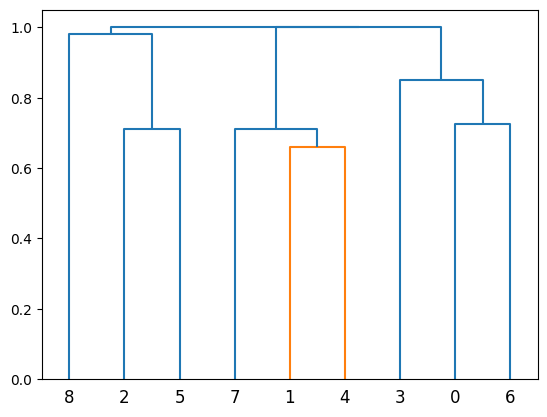

In [26]:
# SLINK HAC using KS Distance

d = ks_dist(y)
print(squareform(d))

Z = linkage(d, method='single')
# print(Z)
dn = dendrogram(Z)
clusters = extract_clusters(Z, dth_ks, len(y))
print(clusters)

[[0.   1.96 1.96 0.42 1.96 1.96 0.09 1.96 1.96]
 [1.96 0.   1.66 1.96 0.07 1.79 1.96 0.08 1.92]
 [1.96 1.66 0.   1.96 1.48 0.07 1.96 1.8  0.57]
 [0.42 1.96 1.96 0.   1.96 1.96 0.14 1.96 1.96]
 [1.96 0.07 1.48 1.96 0.   1.65 1.96 0.27 1.87]
 [1.96 1.79 0.07 1.96 1.65 0.   1.96 1.87 0.29]
 [0.09 1.96 1.96 0.14 1.96 1.96 0.   1.96 1.96]
 [1.96 0.08 1.8  1.96 0.27 1.87 1.96 0.   1.94]
 [1.96 1.92 0.57 1.96 1.87 0.29 1.96 1.94 0.  ]]
[[1, 4, 7], [0, 3, 6], [2, 5, 8]]


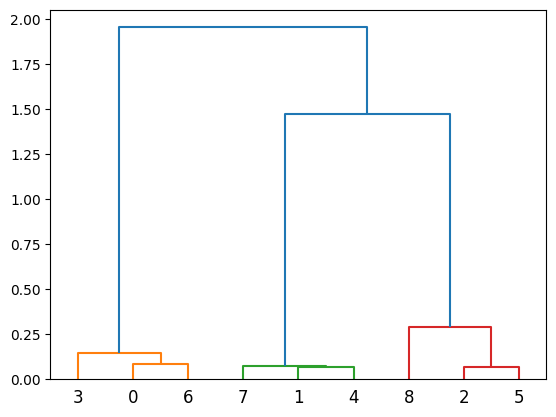

In [27]:
# SLINK HAC using MMD Distance

d = mmd_dist(y)
print(squareform(d))

Z = linkage(d, method='single')
# print(Z)
dn = dendrogram(Z)
clusters = extract_clusters(Z, dth_mmd, len(y))
print(clusters)